In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.spatial.distance import cdist
from sklearn.utils.graph_shortest_path import graph_shortest_path
import scipy.io
from functions import *


In [2]:
read_txt('./data/swiss_roll.txt')

(3, 1600)

In [9]:
mat = scipy.io.loadmat('data/isomap.mat')
m=mat['images']

In [12]:
data= read_txt('./data/swiss_roll.txt')
dist_func="euclidean"
eps = 10.4
n, m = data.shape
dist = cdist(data.T, data.T, metric=dist_func)
adj =  np.zeros((m, m)) + np.inf
bln = dist < eps
adj[bln] = dist[bln]
short = graph_shortest_path(adj)

In [8]:
d = short
dim = 2
n, m = d.shape
h = np.eye(m) - (1/m)*np.ones((m, m))
d = d**2
c = -1/(2*m) * h.dot(d).dot(h)
evals, evecs = linalg.eig(c)
idx = evals.argsort()[::-1]
evals = evals[idx]
evecs = evecs[:, idx]
evals = evals[:dim] 
evecs = evecs[:, :dim]
z = evecs.dot(np.diag(evals**(-1/2)))


array([[-1.64818401e-03+0.j,  1.25486580e-05+0.j],
       [ 1.56286741e-03+0.j, -6.80377020e-04+0.j],
       [-1.69041010e-03+0.j,  8.50290076e-04+0.j],
       ...,
       [ 8.18582897e-04+0.j, -2.10227141e-03+0.j],
       [ 2.03990735e-03+0.j,  1.08799572e-03+0.j],
       [-6.67869490e-04+0.j, -5.65363018e-04+0.j]])

In [43]:
evals[:dim]

array([573.06976512+0.j, 343.99080768+0.j])

In [46]:
z.shape

(698, 2)

In [48]:
data.shape

(4096, 698)

(array([112922., 254146., 554478., 423612., 357286., 343104., 265334.,
        187922.,  54126.,   7070.]),
 array([ 0.        ,  3.14634706,  6.29269413,  9.43904119, 12.58538825,
        15.73173532, 18.87808238, 22.02442944, 25.17077651, 28.31712357,
        31.46347063]),
 <BarContainer object of 10 artists>)

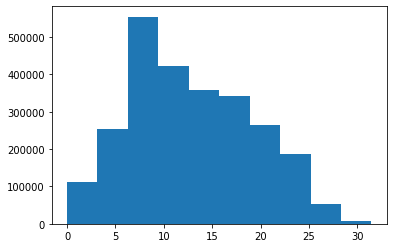

In [11]:
plt.hist(short.flatten())

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
z = pca.fit(data)
print("PCA\n--------\n")
print("Amount of variance explained:{0:.1%}".format(
    sum(z.explained_variance_ratio_[:2])))
print("\n")


PCA
--------

Amount of variance explained:100.0%




In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

In [15]:
z.explained_variance_ratio_

array([0.60674017, 0.39325983])

In [ ]:
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
X, _ = load_digits(return_X_y=True)

embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(X[:100])
X_transformed.shape

In [29]:
from numpy.random import RandomState
import matplotlib.pyplot as plt
from matplotlib import ticker

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import manifold, datasets

rng = RandomState(0)

n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=rng)

In [31]:
def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.savefig('img/'+ title + '.png')

def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=5, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())

In [57]:
isomap = manifold.Isomap(n_neighbors=10, n_components=2, p=1)
transformed = isomap.fit_transform(S_points)
isomap.reconstruction_error()
errors = []
for i in range(1,4):
    isomap = manifold.Isomap(n_neighbors=10, n_components=i, p=1)
    transformed = isomap.fit_transform(S_points)
    print(isomap.reconstruction_error())  
    errors.append(isomap.reconstruction_error())

1.5124622868162088
0.6687017788522717
0.6041764068619898


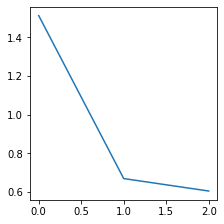

In [54]:
errors

[0.5792297962948476, 0.6041764068618583, 0.6687017788523906]

In [61]:
for i in range(1,4):
    lle = manifold.LocallyLinearEmbedding(n_neighbors=10,n_components=i, method='standard')
    transformed = lle.fit_transform(S_points)
    print(lle.reconstruction_error_)

4.830771215555865e-10
1.1626181083855515e-08
1.3412576475033263e-07


In [63]:
for i in range(1,4):
    lle = manifold.LocallyLinearEmbedding(n_neighbors=10,n_components=i, method='hessian')
    transformed = lle.fit_transform(S_points)
    print(lle.reconstruction_error_)

0.001996847530359288
5.475192396667148e-07
2.4616802871888365e-16


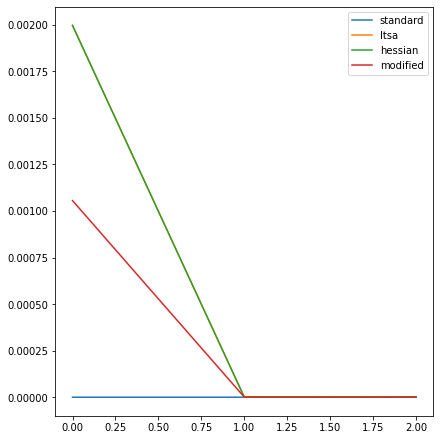

In [69]:
methods = ['standard', 'ltsa', 'hessian', 'modified']
fig, ax = plt.subplots(figsize=(6, 6), facecolor="white", constrained_layout=True)
for method in methods:
    error = []
    for i in range(1,4):
        lle = manifold.LocallyLinearEmbedding(n_neighbors=10,n_components=i, method=method)
        transformed = lle.fit_transform(S_points)
        error.append(lle.reconstruction_error_)
    ax.plot(error, label = f'{method}')
    ax.legend()

In [68]:
error

[4.830763982601579e-10,
 1.1626333593505006e-08,
 1.3417041622241517e-07,
 0.001996845805389067,
 5.475192808442212e-07,
 -1.5561961761272544e-15,
 0.001996846891116953,
 5.475192682216728e-07,
 2.057292280444845e-16,
 0.0010560341331298758,
 7.409464740706109e-07,
 1.2521184653869477e-06]